In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [ ]:
from google.colab import files
upload=files.upload()

Saving used_cars_in_egypt_cleaned.csv to used_cars_in_egypt_cleaned.csv


In [ ]:
df=pd.read_csv('used_cars_in_egypt_cleaned.csv')

In [ ]:
df.head()

,Brand,Model,Color,Year,Fuel,Kilometers,Trasmission,Price,Gov,Cleaned_Price
0,BMW,525,Black,2001.0,gas,"255,000 Km",automatic,"380,000 EGP",Heliopolis,380000.0
1,Opel,Astra,Bronze,2015.0,gas,"130,000 Km",automatic,"480,000 EGP",Cairo,480000.0
2,Chevrolet,Optra,Dark blue,2022.0,gas,"50,000 Km",automatic,"460,000 EGP",Cairo,460000.0
3,Mitsubishi,Lancer Puma,Black,2009.0,gas,"165,000 Km",automatic,"295,000 EGP",Alexandria,295000.0
4,Mercedes,E 320,Cyan,2004.0,gas,"300,000 Km",automatic,"580,000 EGP",Nasr city,580000.0


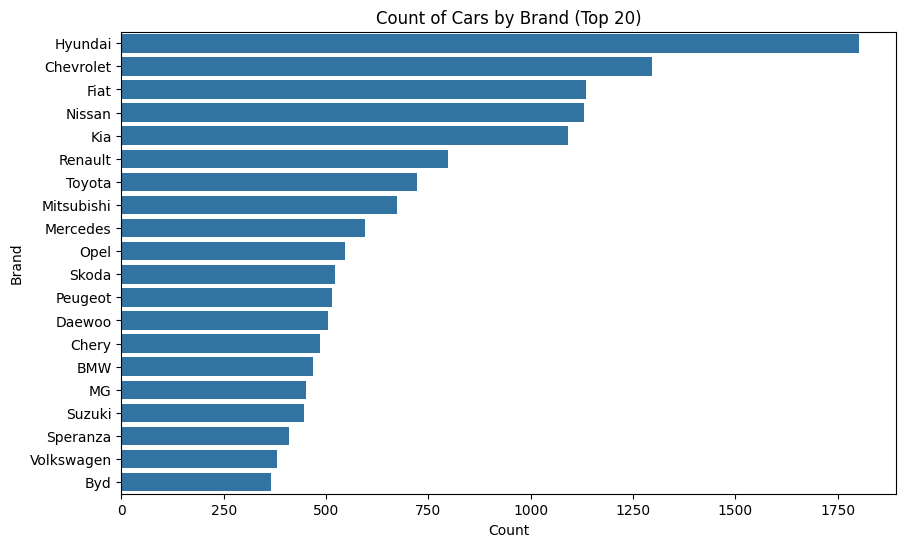

In [ ]:
plt.figure(figsize=(10, 6))
top_20_brands = df['Brand'].value_counts().index[:20]
sns.countplot(y="Brand", data=df, order=top_20_brands)
plt.title("Count of Cars by Brand (Top 20)")
plt.xlabel("Count")
plt.ylabel("Brand")
plt.show()


NameError: name 'ticker' is not defined

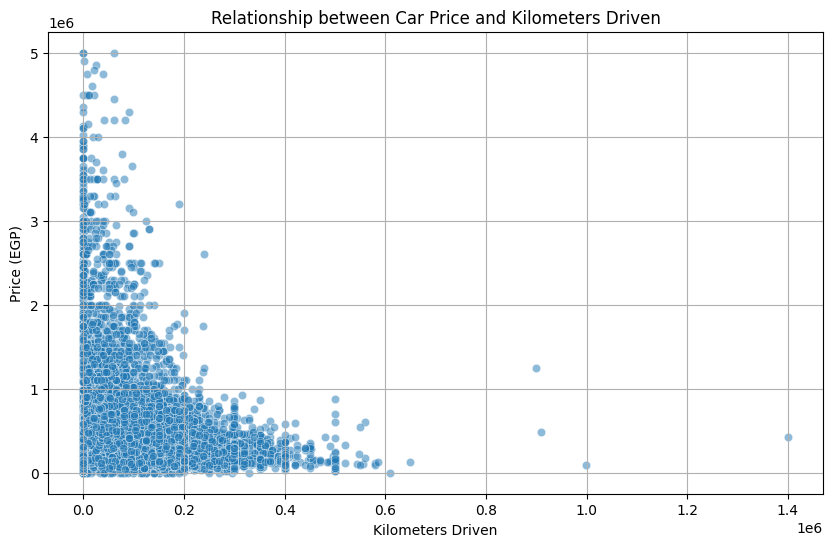

In [ ]:
# Clean 'Kilometers' column
df['Kilometers_cleaned'] = df['Kilometers'].str.replace(',', '').str.replace(' Km', '', regex=False)
df['Kilometers_cleaned'] = pd.to_numeric(df['Kilometers_cleaned'], errors='coerce')

# Ensure Cleaned_Price is numeric (in case it's not)
df['Cleaned_Price'] = pd.to_numeric(df['Cleaned_Price'], errors='coerce')

# Drop rows with missing values in both necessary columns
df_clean = df.dropna(subset=['Cleaned_Price', 'Kilometers_cleaned'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='Kilometers_cleaned', y='Cleaned_Price', data=df_clean, alpha=0.5, ax=ax)

# Customize plot
ax.set_title('Relationship between Car Price and Kilometers Driven')
ax.set_xlabel('Kilometers Driven')
ax.set_ylabel('Price (EGP)')
ax.grid(True)

# Format numbers
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y):,}'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(df_clean['Kilometers_cleaned'], df_clean['Cleaned_Price'])
print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3e}")


Pearson correlation coefficient: -0.260
P-value: 1.305e-262


<ipython-input-10-6055fc6efb8c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')


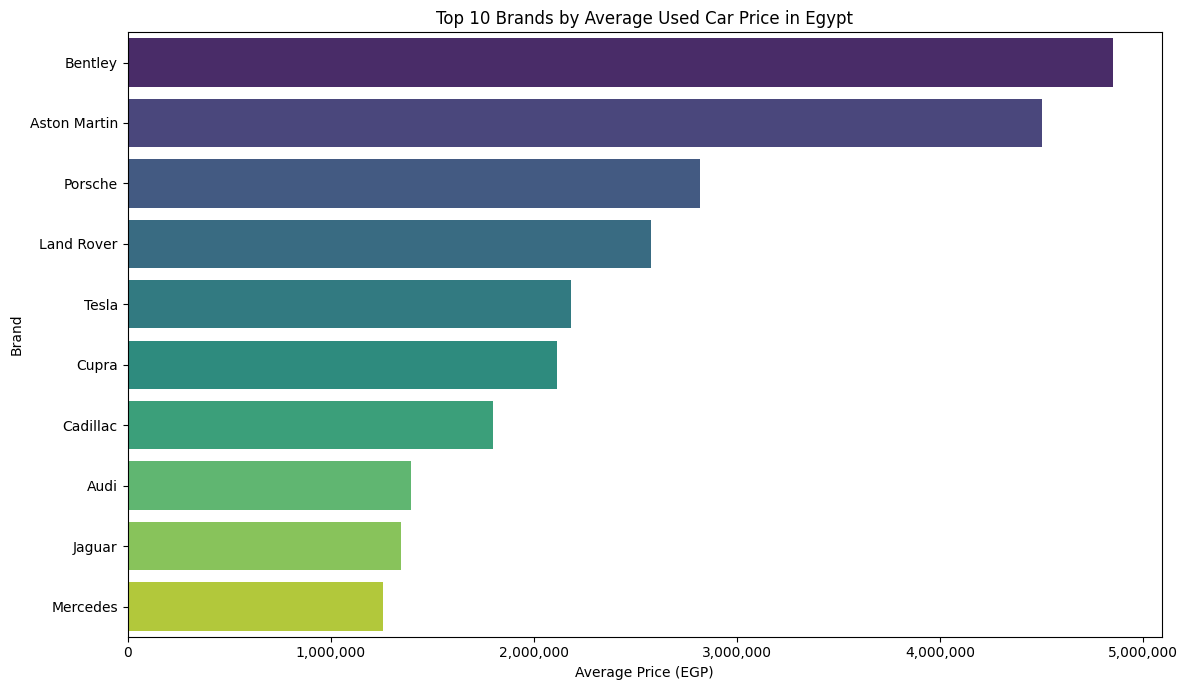

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average price per brand
avg_price_by_brand = df.groupby('Brand')['Cleaned_Price'].mean().sort_values(ascending=False)

# Take top 10 brands by average price (you can adjust this number)
top_brands = avg_price_by_brand.head(10)

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')

plt.title('Top 10 Brands by Average Used Car Price in Egypt')
plt.xlabel('Average Price (EGP)')
plt.ylabel('Brand')

# Format x-axis with thousands separators
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()



<ipython-input-11-aae1d05798f6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_Group'] = df['Year'].apply(lambda y: 'Newer' if y >= median_year else 'Older')
<ipython-input-11-aae1d05798f6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage_Group'] = df['Kilometers_cleaned'].apply(lambda km: 'High Mileage' if km >= median_km else 'Low Mileage')
<ipython-input-11-aae1d05798f6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

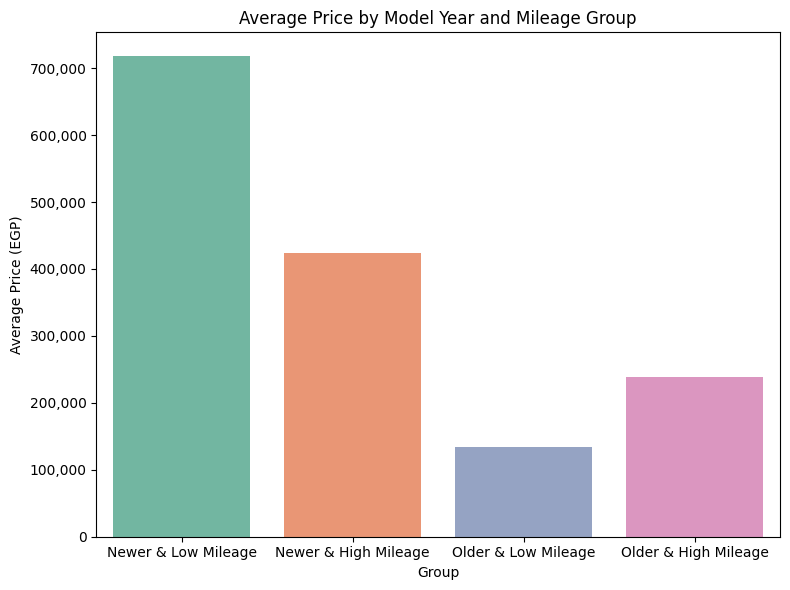

In [ ]:


# Convert to numeric and drop NaNs
df['Kilometers_cleaned'] = pd.to_numeric(df['Kilometers_cleaned'], errors='coerce')
df['Cleaned_Price'] = pd.to_numeric(df['Cleaned_Price'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

df = df.dropna(subset=['Kilometers_cleaned', 'Cleaned_Price', 'Year'])

# Calculate medians
median_year = df['Year'].median()
median_km = df['Kilometers_cleaned'].median()

# Define groups based on median splits
df['Year_Group'] = df['Year'].apply(lambda y: 'Newer' if y >= median_year else 'Older')
df['Mileage_Group'] = df['Kilometers_cleaned'].apply(lambda km: 'High Mileage' if km >= median_km else 'Low Mileage')

# Create combined group label
df['Combined_Group'] = df['Year_Group'] + ' & ' + df['Mileage_Group']

# Calculate average price per combined group
avg_price = df.groupby('Combined_Group')['Cleaned_Price'].mean().reset_index()

# Sort groups to a logical order
group_order = ['Newer & Low Mileage', 'Newer & High Mileage', 'Older & Low Mileage', 'Older & High Mileage']
avg_price['Combined_Group'] = pd.Categorical(avg_price['Combined_Group'], categories=group_order, ordered=True)
avg_price = avg_price.sort_values('Combined_Group')

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=avg_price, x='Combined_Group', y='Cleaned_Price', palette='Set2')

plt.title("Average Price by Model Year and Mileage Group")
plt.xlabel("Group")
plt.ylabel("Average Price (EGP)")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y):,}'))

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import ttest_ind

# Select the two groups
group_new_high = df[(df['Year_Group'] == 'Newer') & (df['Mileage_Group'] == 'High Mileage')]['Cleaned_Price']
group_old_low = df[(df['Year_Group'] == 'Older') & (df['Mileage_Group'] == 'Low Mileage')]['Cleaned_Price']

# Perform two-sample t-test (Welch’s t-test by default: unequal variances)
t_stat, p_value = ttest_ind(group_new_high, group_old_low, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5e}")


T-statistic: 43.787
P-value: 0.00000e+00


<ipython-input-13-f53620acba6b>:2: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.histplot(data=df, x='Cleaned_Price', hue='Trasmission', kde=True, stat="count",


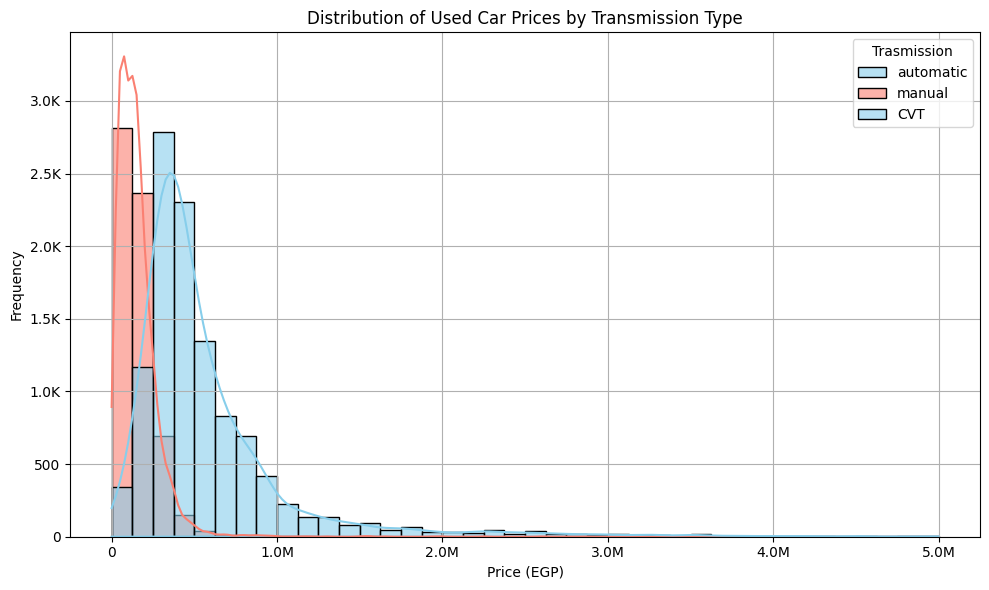

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Cleaned_Price', hue='Trasmission', kde=True, stat="count",
             bins=40, palette=['skyblue', 'salmon'], alpha=0.6)

plt.title('Distribution of Used Car Prices by Transmission Type')
plt.xlabel('Price (EGP)')
plt.ylabel('Frequency')
plt.grid(True)

# 🔧 UPDATED x-axis formatter: Use M for >=1M, full value for <1M
def millions_formatter(x, pos):
    if x < 1_000_000:
        return f'{int(x):,}'  # e.g., 850,000
    else:
        return f'{x / 1_000_000:.1f}M'  # e.g., 1.2M

plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(millions_formatter))

# y-axis formatter for thousands
def thousands_formatter(y, pos):
    if y >= 1000:
        return f'{y/1000:.1f}K'
    else:
        return f'{int(y)}'

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import ttest_ind

# Separate prices by transmission type
auto_prices = df[df['Trasmission'] == 'automatic']['Cleaned_Price']
manual_prices = df[df['Trasmission'] == 'manual']['Cleaned_Price']

# Run t-test (independent samples)
stat, p_value = ttest_ind(auto_prices, manual_prices, equal_var=False)  # Welch's t-test

print(f"T-test statistic: {stat:.4f}")
print(f"P-value: {p_value:.2e}")


T-test statistic: 80.9743
P-value: 0.00e+00


In [ ]:
# Implement the additional hypothesis test in the same format as the previous ones

# Hypothesis 4: Color vs. Price within Hyundai cars (Silver vs. Black)
brand_df = df[df['Brand'] == 'Hyundai']
color1_prices = brand_df[brand_df['Color'] == 'Silver']['Cleaned_Price']
color2_prices = brand_df[brand_df['Color'] == 'Black']['Cleaned_Price']

# Perform Welch's t-test
t_stat_color_hyundai, p_value_color_hyundai = ttest_ind(color1_prices, color2_prices, equal_var=False)

{
    "Test": "Hyundai Silver vs Black (Color)",
    "p-value": round(p_value_color_hyundai, 6),
    "Sample Size (Silver)": len(color1_prices),
    "Sample Size (Black)": len(color2_prices),
    "Decision": "Fail to reject H0" if p_value_color_hyundai > 0.05 else "Reject H0"
}


{'Test': 'Hyundai Silver vs Black (Color)',
 'p-value': np.float64(0.591635),
 'Sample Size (Silver)': 431,
 'Sample Size (Black)': 265,
 'Decision': 'Fail to reject H0'}

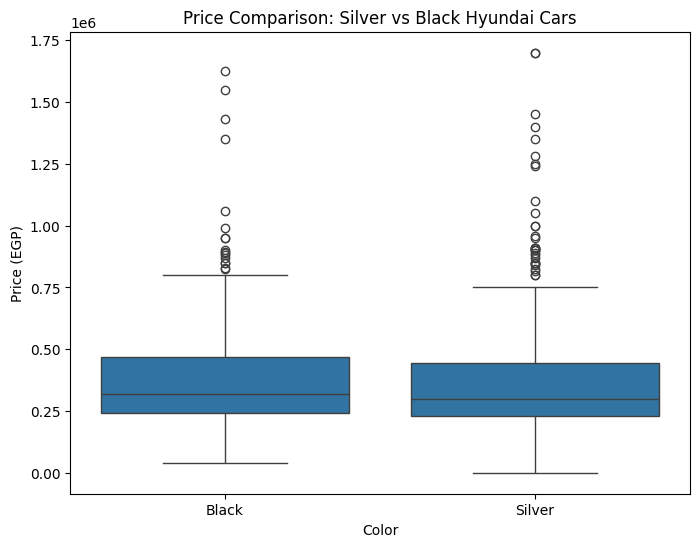

In [ ]:
# Create a boxplot comparing the price distributions of Silver and Black Hyundai cars
plt.figure(figsize=(8, 6))
sns.boxplot(data=brand_df[brand_df['Color'].isin(['Silver', 'Black'])],
            x='Color', y='Cleaned_Price')
plt.title('Price Comparison: Silver vs Black Hyundai Cars')
plt.xlabel('Color')
plt.ylabel('Price (EGP)')
plt.show()


